<a href="https://colab.research.google.com/github/ci5co150/CSCI191T/blob/main/MutliClassLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing Multiclass Logistic Regression using 1 vs rest method

In [12]:
### Includes
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math


In [13]:

data = [((1, 5.1, 3.5), 0), ((1, 4.9, 3.0), 0), ((1, 4.7, 3.2), 0), ((1, 4.6, 3.1), 0), ((1, 5.0, 3.6), 0), ((1, 5.4, 3.9), 0), ((1, 4.6, 3.4), 0), ((1, 5.0, 3.4), 0), ((1, 4.4, 2.9), 0), ((1, 4.9, 3.1), 0), ((1, 5.4, 3.7), 0), ((1, 4.8, 3.4), 0), ((1, 4.8, 3.0), 0), ((1, 4.3, 3.0), 0), ((1, 5.8, 4.0), 0), ((1, 5.7, 4.4), 0), ((1, 5.4, 3.9), 0), ((1, 5.1, 3.5), 0), ((1, 5.7, 3.8), 0), ((1, 5.1, 3.8), 0), ((1, 5.4, 3.4), 0), ((1, 5.1, 3.7), 0), ((1, 4.6, 3.6), 0), ((1, 5.1, 3.3), 0), ((1, 4.8, 3.4), 0), ((1, 5.0, 3.0), 0), ((1, 5.0, 3.4), 0), ((1, 5.2, 3.5), 0), ((1, 5.2, 3.4), 0), ((1, 4.7, 3.2), 0), ((1, 4.8, 3.1), 0), ((1, 5.4, 3.4), 0), ((1, 5.2, 4.1), 0), ((1, 5.5, 4.2), 0), ((1, 4.9, 3.1), 0), ((1, 5.0, 3.2), 0), ((1, 5.5, 3.5), 0), ((1, 4.9, 3.6), 0), ((1, 4.4, 3.0), 0), ((1, 5.1, 3.4), 0), ((1, 5.0, 3.5), 0), ((1, 4.5, 2.3), 0), ((1, 4.4, 3.2), 0), ((1, 5.0, 3.5), 0), ((1, 5.1, 3.8), 0), ((1, 4.8, 3.0), 0), ((1, 5.1, 3.8), 0), ((1, 4.6, 3.2), 0), ((1, 5.3, 3.7), 0), ((1, 5.0, 3.3), 0), ((1, 7.0, 3.2), 1), ((1, 6.4, 3.2), 1), ((1, 6.9, 3.1), 1), ((1, 5.5, 2.3), 1), ((1, 6.5, 2.8), 1), ((1, 5.7, 2.8), 1), ((1, 6.3, 3.3), 1), ((1, 4.9, 2.4), 1), ((1, 6.6, 2.9), 1), ((1, 5.2, 2.7), 1), ((1, 5.0, 2.0), 1), ((1, 5.9, 3.0), 1), ((1, 6.0, 2.2), 1), ((1, 6.1, 2.9), 1), ((1, 5.6, 2.9), 1), ((1, 6.7, 3.1), 1), ((1, 5.6, 3.0), 1), ((1, 5.8, 2.7), 1), ((1, 6.2, 2.2), 1), ((1, 5.6, 2.5), 1), ((1, 5.9, 3.2), 1), ((1, 6.1, 2.8), 1), ((1, 6.3, 2.5), 1), ((1, 6.1, 2.8), 1), ((1, 6.4, 2.9), 1), ((1, 6.6, 3.0), 1), ((1, 6.8, 2.8), 1), ((1, 6.7, 3.0), 1), ((1, 6.0, 2.9), 1), ((1, 5.7, 2.6), 1), ((1, 5.5, 2.4), 1), ((1, 5.5, 2.4), 1), ((1, 5.8, 2.7), 1), ((1, 6.0, 2.7), 1), ((1, 5.4, 3.0), 1), ((1, 6.0, 3.4), 1), ((1, 6.7, 3.1), 1), ((1, 6.3, 2.3), 1), ((1, 5.6, 3.0), 1), ((1, 5.5, 2.5), 1), ((1, 5.5, 2.6), 1), ((1, 6.1, 3.0), 1), ((1, 5.8, 2.6), 1), ((1, 5.0, 2.3), 1), ((1, 5.6, 2.7), 1), ((1, 5.7, 3.0), 1), ((1, 5.7, 2.9), 1), ((1, 6.2, 2.9), 1), ((1, 5.1, 2.5), 1), ((1, 5.7, 2.8), 1), ((1, 6.3, 3.3), 2), ((1, 5.8, 2.7), 2), ((1, 7.1, 3.0), 2), ((1, 6.3, 2.9), 2), ((1, 6.5, 3.0), 2), ((1, 7.6, 3.0), 2), ((1, 4.9, 2.5), 2), ((1, 7.3, 2.9), 2), ((1, 6.7, 2.5), 2), ((1, 7.2, 3.6), 2), ((1, 6.5, 3.2), 2), ((1, 6.4, 2.7), 2), ((1, 6.8, 3.0), 2), ((1, 5.7, 2.5), 2), ((1, 5.8, 2.8), 2), ((1, 6.4, 3.2), 2), ((1, 6.5, 3.0), 2), ((1, 7.7, 3.8), 2), ((1, 7.7, 2.6), 2), ((1, 6.0, 2.2), 2), ((1, 6.9, 3.2), 2), ((1, 5.6, 2.8), 2), ((1, 7.7, 2.8), 2), ((1, 6.3, 2.7), 2), ((1, 6.7, 3.3), 2), ((1, 7.2, 3.2), 2), ((1, 6.2, 2.8), 2), ((1, 6.1, 3.0), 2), ((1, 6.4, 2.8), 2), ((1, 7.2, 3.0), 2), ((1, 7.4, 2.8), 2), ((1, 7.9, 3.8), 2), ((1, 6.4, 2.8), 2), ((1, 6.3, 2.8), 2), ((1, 6.1, 2.6), 2), ((1, 7.7, 3.0), 2), ((1, 6.3, 3.4), 2), ((1, 6.4, 3.1), 2), ((1, 6.0, 3.0), 2), ((1, 6.9, 3.1), 2), ((1, 6.7, 3.1), 2), ((1, 6.9, 3.1), 2), ((1, 5.8, 2.7), 2), ((1, 6.8, 3.2), 2), ((1, 6.7, 3.3), 2), ((1, 6.7, 3.0), 2), ((1, 6.3, 2.5), 2), ((1, 6.5, 3.0), 2), ((1, 6.2, 3.4), 2), ((1, 5.9, 3.0), 2)]
dataX = [(d[0], d[1], d[2]) for d,_ in data]
dataY = [y for _,y in data]


Represent the data graphically

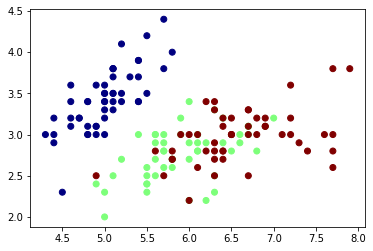

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [14]:
dataX1 = [x[1] for x,_ in data]
dataX2 = [x[2] for x,_ in data]
plt.scatter(dataX1,dataX2, c=dataY,cmap='jet')
plt.show()
print(dataY)


Setting up train and test data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataX, dataY, test_size=0.33, random_state=45)

print(X_train)

[(1, 4.8, 3.0), (1, 5.6, 3.0), (1, 6.4, 2.8), (1, 5.3, 3.7), (1, 6.7, 3.3), (1, 5.1, 3.8), (1, 4.7, 3.2), (1, 5.6, 2.7), (1, 4.6, 3.2), (1, 5.5, 2.6), (1, 6.3, 2.5), (1, 6.0, 3.0), (1, 5.6, 2.5), (1, 6.9, 3.1), (1, 4.7, 3.2), (1, 5.1, 3.4), (1, 4.5, 2.3), (1, 5.1, 3.3), (1, 6.1, 2.8), (1, 5.0, 3.4), (1, 7.0, 3.2), (1, 7.7, 3.0), (1, 5.5, 2.4), (1, 6.1, 2.8), (1, 6.2, 2.9), (1, 4.9, 3.1), (1, 5.4, 3.4), (1, 6.0, 2.7), (1, 5.7, 3.8), (1, 6.0, 2.9), (1, 6.3, 3.3), (1, 7.7, 2.8), (1, 5.8, 2.8), (1, 5.5, 2.5), (1, 5.8, 2.7), (1, 6.8, 3.2), (1, 5.5, 2.4), (1, 5.4, 3.9), (1, 5.6, 3.0), (1, 5.7, 2.8), (1, 5.2, 2.7), (1, 7.1, 3.0), (1, 5.7, 2.8), (1, 5.9, 3.2), (1, 7.3, 2.9), (1, 5.0, 2.0), (1, 6.6, 2.9), (1, 5.9, 3.0), (1, 6.1, 3.0), (1, 6.5, 3.0), (1, 5.2, 3.5), (1, 4.6, 3.6), (1, 5.1, 2.5), (1, 7.2, 3.6), (1, 6.3, 2.5), (1, 6.1, 2.6), (1, 5.4, 3.9), (1, 6.5, 2.8), (1, 6.5, 3.0), (1, 6.1, 2.9), (1, 6.6, 3.0), (1, 6.7, 3.0), (1, 5.0, 3.3), (1, 6.3, 3.4), (1, 6.5, 3.0), (1, 4.8, 3.4), (1, 4.4, 

How our train data looks

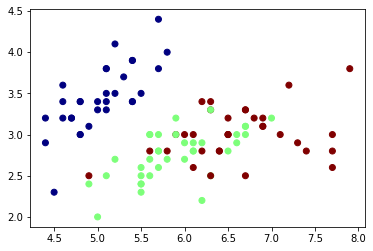

In [16]:
dataX1_train = [x[1] for x in X_train]
dataX2_train = [x[2] for x in X_train]

dataY_train = Y_train

plt.scatter(dataX1_train, dataX2_train , c=dataY_train,cmap='jet')
plt.show()

Create expected result data for 0 vs [1,2]

In [17]:
# expected result for class 0. Turn 0s to 1s (true) and the rest to 0's (false)
Y0 =  [y+1 if y==0 else y-y for y in dataY]
Y0_train = [y+1 if y==0 else y-y for y in Y_train]
Y0_test = [y+1 if y==0 else y-y for y in Y_test]

Create expected result data for 1 vs [1,2]

In [18]:
# expected result for class 1. Keep 1s (true) and the rest to 0s (false)
Y1_train = [y if y==1 else y-y for y in Y_train]
Y1_test = [y if y==1 else y-y for y in Y_test]

Create expected result data fordata for 2 vs [0,1]

In [19]:
# expected result for class 2. Turn 2s to 1s (true) and the rest to 0s (false)
Y2_train = [y-1 if y==2 else y-y for y in Y_train]
Y2_test = [y-1 if y==2 else y-y for y in Y_test]

Create the tree models

In [20]:
model0 = [0,0,0] # for class 0
model1 = [0,0,0] # for class 1
model2 = [0,0,0] # for class 2

Simple Logistical Regression function


In [21]:

def logReg(data,yHat,model):
  yprime =[]
  alpha = 0.001
  F = lambda W, X: sum([w*x for w,x in zip(W,X)])
  sigmoid = lambda y: 1/(1+math.exp(-y))
  classify = lambda y: 1 if y>0.5 else 0

  w = model

  X = [(d[0], d[1], d[2]) for d in data]

  Y = yHat
  for _ in range(2000):
    yPredicted = [sigmoid(F(w, x)) for x in X]
    deltaX0 = sum( [((r-y)*x[0]) for r,y,x in zip(Y, yPredicted, X)] )
    deltaX1 = sum( [((r-y)*x[1]) for r,y,x in zip(Y, yPredicted, X)] )
    deltaX2 = sum( [((r-y)*x[2]) for r,y,x in zip(Y, yPredicted, X)] )
    
    w = [w[0]+alpha*deltaX0, w[1]+alpha*deltaX1, w[2]+alpha*deltaX2]

  return w

print("Model for Y0")
model0 = logReg(X_train,Y0_train,model0)
print(model0)

print("\nModel for Y1")
model1 = logReg(X_train,Y1_train,model1)
print(model1)

print("\nModel for Y2")
model2 = logReg(X_train,Y2_train,model2)
print(model2)


Model for Y0
[1.1094229095989445, -3.7232549257207888, 6.0582885155149935]

Model for Y1
[2.316491908881084, 0.5344636637267679, -2.044554302629498]

Model for Y2
[-3.3693630064192686, 1.3954739975732697, -1.8953383272605249]


Find the best model from the 3

In [22]:
F = lambda W, X: sum([w*x for w,x in zip(W,X)])
sigmoid = lambda y: 1/(1+math.exp(-y))
classify = lambda y: 1 if y>0.5 else 0

X_test_prime = X_test
Y2_test_prime = Y2_test

yPredicted_with_model0 = ([round(sigmoid(F(model0, x)),3) for x in X_test],0)


yPredicted_with_model1 = ([round(sigmoid(F(model1, x)),3) for x in X_test],1)


yPredicted_with_model2 = ([round(sigmoid(F(model2, x)),3) for x in X_test],2)


#check for the "best" model to pick from the 3
predicted_test =[]
u = len(Y_test)
for i in range(u):
  if (yPredicted_with_model0[0][i] >= yPredicted_with_model1[0][i]  and 
      yPredicted_with_model0[0][i]  >= yPredicted_with_model2[0][i] ):
      predicted_test.append(yPredicted_with_model0[1])

  elif (yPredicted_with_model1[0][i]  >= yPredicted_with_model0[0][i]  and
      yPredicted_with_model1[0][i]  >= yPredicted_with_model2[0][i] ):
      predicted_test.append(yPredicted_with_model1[1])

  else:
      predicted_test.append(yPredicted_with_model2[1])

print("varibles, Y Test , Y Predicted Test")
incorrect = 0
for i in range(u):
  if(Y_test[i] != predicted_test[i]):
    incorrect+=1
  print(X_test[i], Y_test[i], predicted_test[i] )
print("Errors: ", incorrect, "of ", u, "test samples.")


varibles, Y Test , Y Predicted Test
(1, 5.1, 3.5) 0 0
(1, 5.0, 3.5) 0 0
(1, 7.2, 3.0) 2 2
(1, 4.6, 3.1) 0 0
(1, 4.9, 3.1) 0 0
(1, 5.1, 3.8) 0 0
(1, 4.4, 3.0) 0 0
(1, 7.6, 3.0) 2 2
(1, 6.3, 2.7) 2 2
(1, 6.7, 3.1) 2 2
(1, 5.2, 3.4) 0 0
(1, 7.2, 3.2) 2 2
(1, 5.7, 2.5) 2 1
(1, 6.3, 2.9) 2 2
(1, 6.3, 2.8) 2 2
(1, 5.0, 3.2) 0 0
(1, 6.7, 3.0) 2 2
(1, 5.8, 2.7) 2 1
(1, 5.0, 3.5) 0 0
(1, 6.3, 2.3) 1 2
(1, 5.4, 3.0) 1 0
(1, 6.0, 3.4) 1 0
(1, 6.4, 3.2) 2 2
(1, 6.4, 3.2) 1 2
(1, 5.0, 3.6) 0 0
(1, 6.8, 3.0) 2 2
(1, 5.8, 2.6) 1 1
(1, 5.6, 2.9) 1 1
(1, 5.4, 3.7) 0 0
(1, 6.1, 3.0) 1 2
(1, 6.8, 2.8) 1 2
(1, 5.7, 2.9) 1 1
(1, 6.0, 2.2) 2 1
(1, 5.8, 2.7) 2 1
(1, 5.0, 3.0) 0 0
(1, 6.4, 3.1) 2 2
(1, 4.3, 3.0) 0 0
(1, 5.0, 3.4) 0 0
(1, 6.4, 2.9) 1 2
(1, 4.8, 3.1) 0 0
(1, 5.5, 4.2) 0 0
(1, 5.8, 2.7) 1 1
(1, 4.9, 3.0) 0 0
(1, 6.9, 3.1) 1 2
(1, 5.0, 2.3) 1 1
(1, 5.1, 3.7) 0 0
(1, 6.4, 2.7) 2 2
(1, 6.0, 2.2) 1 1
(1, 7.7, 3.8) 2 2
(1, 4.9, 3.6) 0 0
Errors:  12 of  50 test samples.
